
Sample rows from the cleaned dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male alive  alone  
0    man        True    no  False  
1  woman       False   yes  False  
2  woman       False   yes   True  
3  woman       False   yes  False  
4    man        True    no   True  
Missing values after cleaning:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64


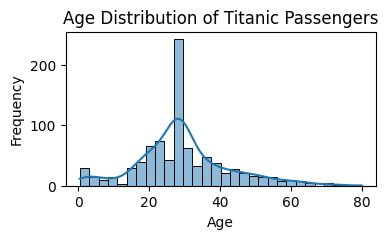

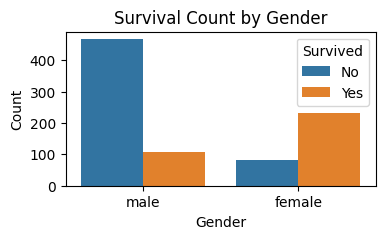

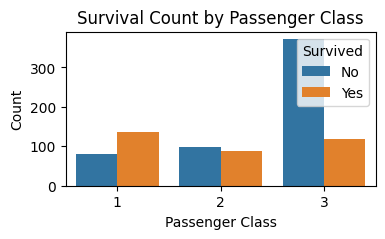

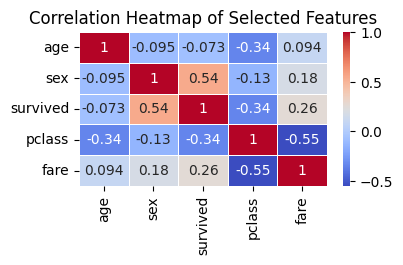

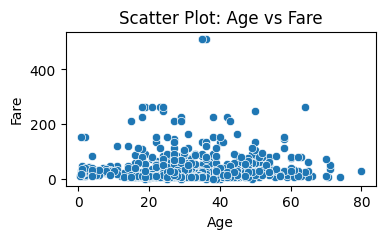

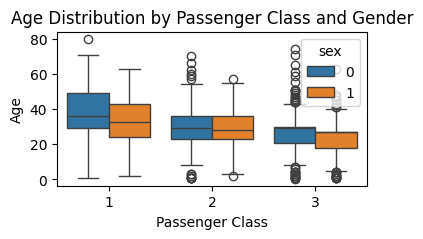

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Step 3: Data Cleaning
# Fill missing 'age' values based on gender
median_age_female = df[df['sex'] == 'female']['age'].median()
median_age_male = df[df['sex'] == 'male']['age'].median()

df.loc[df['sex'] == 'female', 'age'] = df.loc[df['sex'] == 'female', 'age'].fillna(median_age_female)
df.loc[df['sex'] == 'male', 'age'] = df.loc[df['sex'] == 'male', 'age'].fillna(median_age_male)

# Fill missing 'embarked' values using an alternative approach to avoid the warning
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop columns with too many missing values or that aren't useful
df.drop(columns=['deck', 'embark_town'], inplace=True)

# Display a few rows of the final cleaned DataFrame
print("\nSample rows from the cleaned dataset:")
print(df.head())

# Verify that there are no more missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

# Step 4: Data Exploration and Visualization

# 1. Distribution of ages
plt.figure(figsize=(4, 2))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Survival rate by gender
plt.figure(figsize=(4, 2))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# 3. Survival rate by passenger class
plt.figure(figsize=(4, 2))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# 4. Correlation heatmap of selected features
plt.figure(figsize=(4, 2))
# Convert 'sex' to a numerical representation
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
selected_features = df[['age', 'sex', 'survived', 'pclass', 'fare']]
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# 5. Scatter plot between age and fare
plt.figure(figsize=(4, 2))
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Scatter Plot: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 6. Boxplot of age by class and gender
plt.figure(figsize=(4, 2))
sns.boxplot(x='pclass', y='age', hue='sex', data=df)
plt.title('Age Distribution by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()
